# DBSCAN

## Introduction
DBSCAN(Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm.  
The data are clustered based on the density of the data points.


## Definition
- Epsilon: The distance that defines the nearby points. If the distance between two points is less than epsilon, then they are nearby points.
- Min Points: The minimum number of points to form a cluster.
- Core Point: A point is a core point if there are at least min Points nearby within the distance epsilon.
- Border Point: A point is a border point if there are less than min Points nearby within the distance epsilon, but the point is reachable from a core point.
- Noise Point: A point is a noise point that is neither a core point nor a border point.
- Cluster: A cluster is a set of core points and border points that are density-reachable from the core points.

## Algorithm
1. Set the Hyperparameters: epsilon and min Points. 
2. Randomly select a point P.  
3. Find all the points nearby P within the distance epsilon.
4. If the number of points nearby P not less than min Points, then P is a core point.
5. All the points nearby P are in the same cluster. Merge the clusters if they have common points. 
6. Repeat the process 2 to 5 until all the points are visited.  

## Hyperparameters
1. epsilon: The distance to find the nearby points.
2. min Points: The minimum number of points to form a cluster.

## Implementation

In [24]:
import numpy as np

class DBSCAN:
    def __init__(self, epsilon:float, minPoints:int):
        self.epsilon = epsilon
        self.minPoints = minPoints
    
    def fit(self, X:np.ndarray):
        n, m = X.shape
        self.labels = np.full(n, -1) # undefined label is -1
        self.cluster_cnt = 0
        
        for i in range(n):
            if self.labels[i] != -1:
                continue
            neighbours = self._find_neighbours(X, i)
            # Density check
            if len(neighbours) < self.minPoints:
                self.labels[i] = 0 # Noise point
                continue
            self.cluster_cnt += 1 # new cluster
            self.labels[i] = self.cluster_cnt # label core point
            self._expand_cluster(X, neighbours) # expand cluster
    
    def _expand_cluster(self, X: np.ndarray, neighbours: np.ndarray):
        i = 0
        while i < len(neighbours):
            j = neighbours[i]
            
            if self.labels[j] == 0:  # noise point -> border point
                self.labels[j] = self.cluster_cnt
            
            if self.labels[j] == -1:  # undefined point -> core point or border point
                self.labels[j] = self.cluster_cnt  
                
                new_neighbours = self._find_neighbours(X, j) 
                if len(new_neighbours) >= self.minPoints:
                    neighbours = np.concatenate((neighbours, new_neighbours)) # merge the clusters
            
            i += 1  
            
    def _find_neighbours(self, X:np.ndarray, i:int):
        return np.where(np.linalg.norm(X - X[i], axis=1) < self.epsilon)[0]

### Test

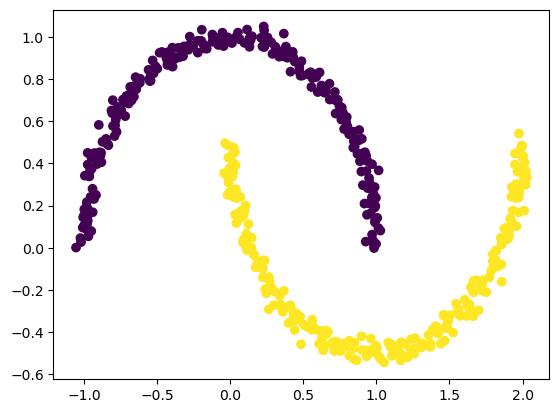

In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.03, random_state=44)

dbscan = DBSCAN(epsilon=0.1, minPoints=5)
dbscan.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels)
plt.show()

### Hyperparameters Tuning
Hyperparameter is Tuned by:
- Grid Search
    - using Silhouette Score
- Elbow Method
    - used to find the optimal epsilon value

#### Grid Search
Grid search is used to find the optimal hyperparameters. It is computationally expensive but it is effective. Uses the Silhouette Score to find the optimal hyperparameters.

In [29]:
def silhouette_score(X, labels):
    n = len(X)
    a = np.mean([np.mean([np.linalg.norm(X[i] - X[j]) for j in range(n) if labels[j] == labels[i]]) for i in range(n)])

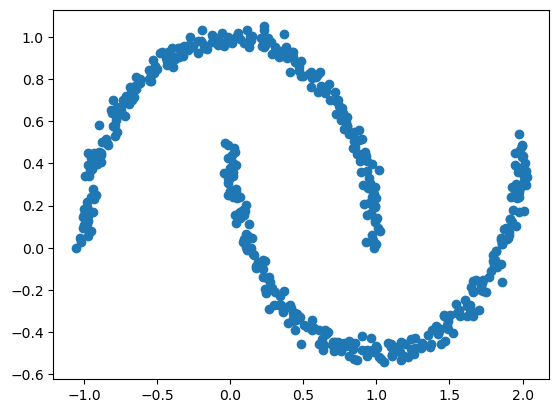

In [30]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.03, random_state=44)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [31]:
# Grid Search
best_score = -1
best_epsilon = -1
best_minPoints = -1
for epsilon in np.linspace(0.01, 0.2, 20):
    for minPoints in range(2, 10):
        dbscan = DBSCAN(epsilon=epsilon, minPoints=minPoints)
        dbscan.fit(X)
        score = silhouette_score(X, dbscan.labels)
        if score > best_score:
            best_score = score
            best_epsilon = epsilon
            best_minPoints = minPoints
print("Best epsilon:", best_epsilon)
print("Best minPoints:", best_minPoints)
print("Best Score:", best_score)

ValueError: zero-size array to reduction operation minimum which has no identity